In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, accuracy_score

import seaborn as sb

C:\Anaconda3\lib\site-packages\pandas\compat\_optional.py:138: UserWarning: Pandas requires version '2.7.0' or newer of 'numexpr' (version '2.6.9' currently installed).
  warnings.warn(msg, UserWarning)


In [2]:
chromConvert = {
               'chr_18': 0, 
               'chr_18_p11_deletion': 1
               }

In [3]:
chromConvert_reverse = {
                0: 'chr_18',
                1: 'chr_18_p11_deletion'
               }

In [4]:
label = ['chr_18', 'chr_18_p11_deletion']

label_convert = []

for i in range(2):
    label_convert.append(chromConvert_reverse[i])

# Load test and predict values

In [5]:
y_test_all = []
y_predict_all = []
y_predict_filtered_all = []

In [6]:
for iterationNumber in range(7):
    with open('data_y_test_value_iteration_' + str(iterationNumber) + '.npy', 'rb') as f_y_test:
        y_test_all.append(np.load(f_y_test))
        
    with open('data_y_predict_value_iteration_' + str(iterationNumber) + '.npy', 'rb') as f_y_predict:
        y_predict_all.append(np.load(f_y_predict))                             
                        
    with open('data_y_predict_filtered_value_iteration_' + str(iterationNumber) + '.npy', 'rb') as f_y_predict_filtered:
        y_predict_filtered_all.append(np.load(f_y_predict_filtered))

In [7]:
y_predict_all[0].shape

(37, 2)

In [8]:
y_predict_all

[array([[1.0000000e+00, 7.6423561e-09],
        [1.0000000e+00, 1.2593979e-13],
        [9.8733437e-01, 9.9365590e-03],
        [9.9999332e-01, 2.7388255e-06],
        [1.0000000e+00, 3.0100176e-11],
        [9.6250629e-01, 2.5520314e-02],
        [9.9991620e-01, 3.6489881e-05],
        [1.0000000e+00, 1.1548579e-09],
        [1.0000000e+00, 9.0724690e-18],
        [9.9999964e-01, 9.1135291e-07],
        [1.0000000e+00, 4.4747361e-15],
        [1.0000000e+00, 3.0641337e-10],
        [9.9220604e-01, 5.1638591e-03],
        [9.9999547e-01, 5.2819805e-06],
        [9.9999988e-01, 2.3629163e-07],
        [4.1328854e-05, 9.9964714e-01],
        [1.0000000e+00, 2.5752053e-10],
        [1.0000000e+00, 3.8809440e-09],
        [9.9931240e-01, 5.6766404e-04],
        [9.9993312e-01, 4.1871273e-05],
        [1.0000000e+00, 3.1158066e-11],
        [9.8917985e-01, 7.7520884e-03],
        [1.0000000e+00, 2.1953789e-10],
        [1.0000000e+00, 7.2733869e-08],
        [9.9999654e-01, 3.4098282e-06],


In [9]:
y_test_concatenate_list = []
y_predict_concatenate_list = []
y_predict_filtered_concatenate_list = []

In [10]:
for i in range(7):
    y_test_concatenate_list.extend(list(y_test_all[i]))
    y_predict_concatenate_list.extend(list(y_predict_all[i]))
    y_predict_filtered_concatenate_list.extend(list(y_predict_filtered_all[i]))

In [11]:
y_predict_all[0].shape

(37, 2)

In [12]:
label_convert

['chr_18', 'chr_18_p11_deletion']

In [13]:
len(y_test_concatenate_list)

251

In [14]:
len(y_predict_filtered_concatenate_list)

251

In [15]:
len(y_predict_concatenate_list)

251

# Classification Report

## Accuracy

In [16]:
acc = accuracy_score(y_test_concatenate_list, y_predict_filtered_concatenate_list, normalize=True, sample_weight=None)
print('Accuracy is ', acc)

Accuracy is  0.9203187250996016


## Precision, Recall, and F1

In [17]:
performanceReport = classification_report(y_test_concatenate_list, y_predict_filtered_concatenate_list, 
                                          target_names=label_convert)


print(performanceReport)

                     precision    recall  f1-score   support

             chr_18       0.93      0.95      0.94       176
chr_18_p11_deletion       0.89      0.84      0.86        75

          micro avg       0.92      0.92      0.92       251
          macro avg       0.91      0.90      0.90       251
       weighted avg       0.92      0.92      0.92       251



## Confusion Matrix

In [18]:
cm = np.array(confusion_matrix(y_test_concatenate_list, y_predict_filtered_concatenate_list))
confusion = pd.DataFrame(cm, index=label_convert,
                        columns=label_convert)
confusion.to_csv('ConfusionMatrix_Combination_of_CrossValidation_KaryoType_CNN' + str(iterationNumber) + '.csv')
confusion

,chr_18,chr_18_p11_deletion
chr_18,168,8
chr_18_p11_deletion,12,63


### 3.10.4 Rate of Confusion Matrix

### 3.10.5 Recall (查全率)，(Sensitivity Rate)

In [19]:
subtotal = [0] * 2  
for item in y_test_concatenate_list:
    subtotal[item] = subtotal[item] + 1

#### predict number divided by y test

In [20]:
cm_r = []
for i in range(2):
    cm_r.append(cm[i]/subtotal[i])

In [21]:
confusion_r = pd.DataFrame(cm_r, index=label_convert,
                        columns=label_convert)
confusion_r.to_csv('ConfusionMatrix_Recall_Integration_CNN.csv')
confusion_r

,chr_18,chr_18_p11_deletion
chr_18,0.954545,0.045455
chr_18_p11_deletion,0.160000,0.840000


### 3.10.6 Precision (查准率）

In [22]:
subtotal_predict = [0] * 2 
for item in y_predict_filtered_concatenate_list:
    subtotal_predict[item] = subtotal_predict[item] + 1

#### predict number divided by y predicted

In [23]:
cm_p = []
for i in range(2):
    cm_p.append(cm[:,i]/subtotal_predict[i])

In [24]:
confusion_p = pd.DataFrame(cm_p, index=label_convert,
                        columns=label_convert)
confusion_p.to_csv('ConfusionMatrix_Precision_Integration_CNN.csv')
confusion_p

,chr_18,chr_18_p11_deletion
chr_18,0.933333,0.066667
chr_18_p11_deletion,0.112676,0.887324


#### Heat Map: Number

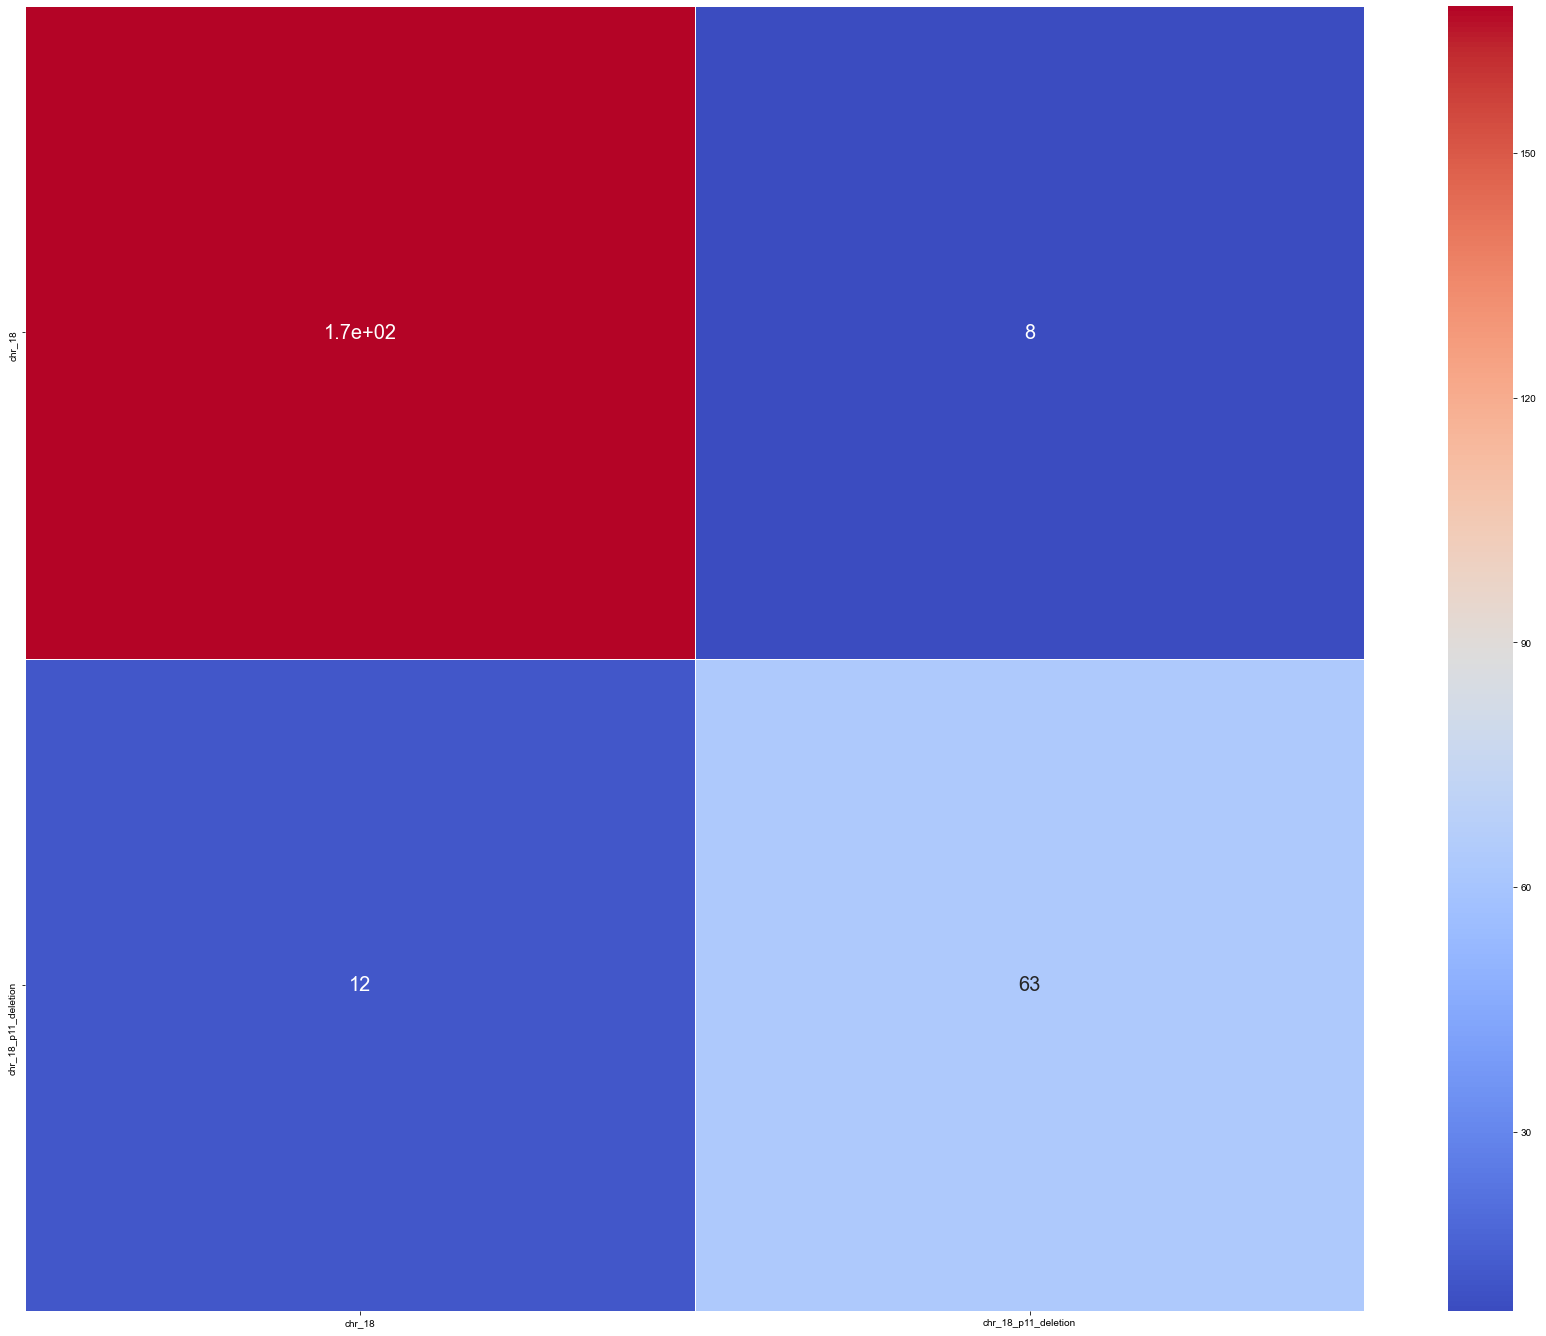

In [25]:
plt.figure(figsize=(30, 24))
heat_map = sb.heatmap(confusion, annot=True,  # It's a Seaborn function
                      cmap='coolwarm', 
                      xticklabels=confusion.columns, yticklabels=confusion.index, 
                      linewidths=.5, 
                      annot_kws={"size": 20})
sb.set(font_scale = 2)

#### Heat Map of Recall: Rate (important!!!)

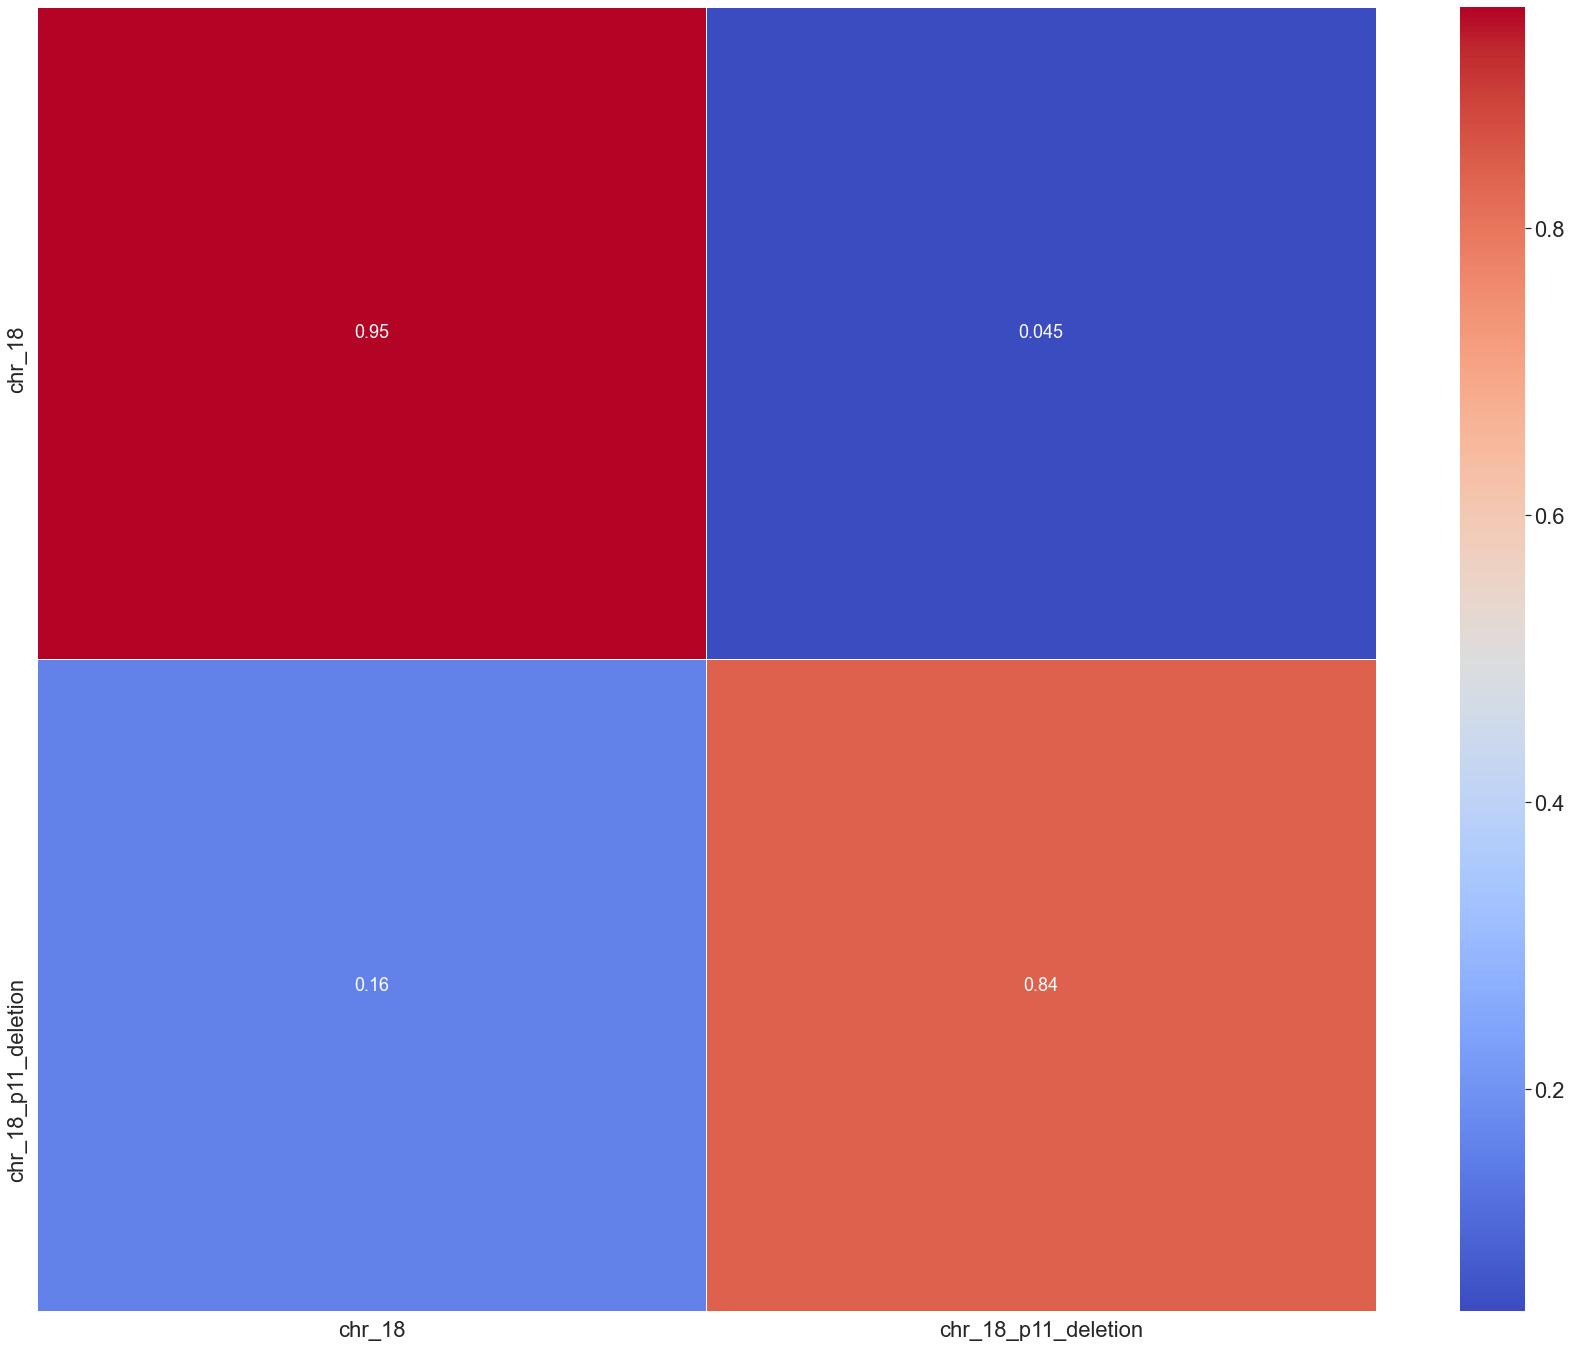

In [26]:
plt.figure(figsize=(30, 24))
heat_map_r = sb.heatmap(confusion_r, annot=True,  # It's a Seaborn function
                      cmap='coolwarm', 
                      xticklabels=confusion.columns, yticklabels=confusion.index, 
                      linewidths=1, 
                      annot_kws={"size": 18})
sb.set(font_scale = 2)

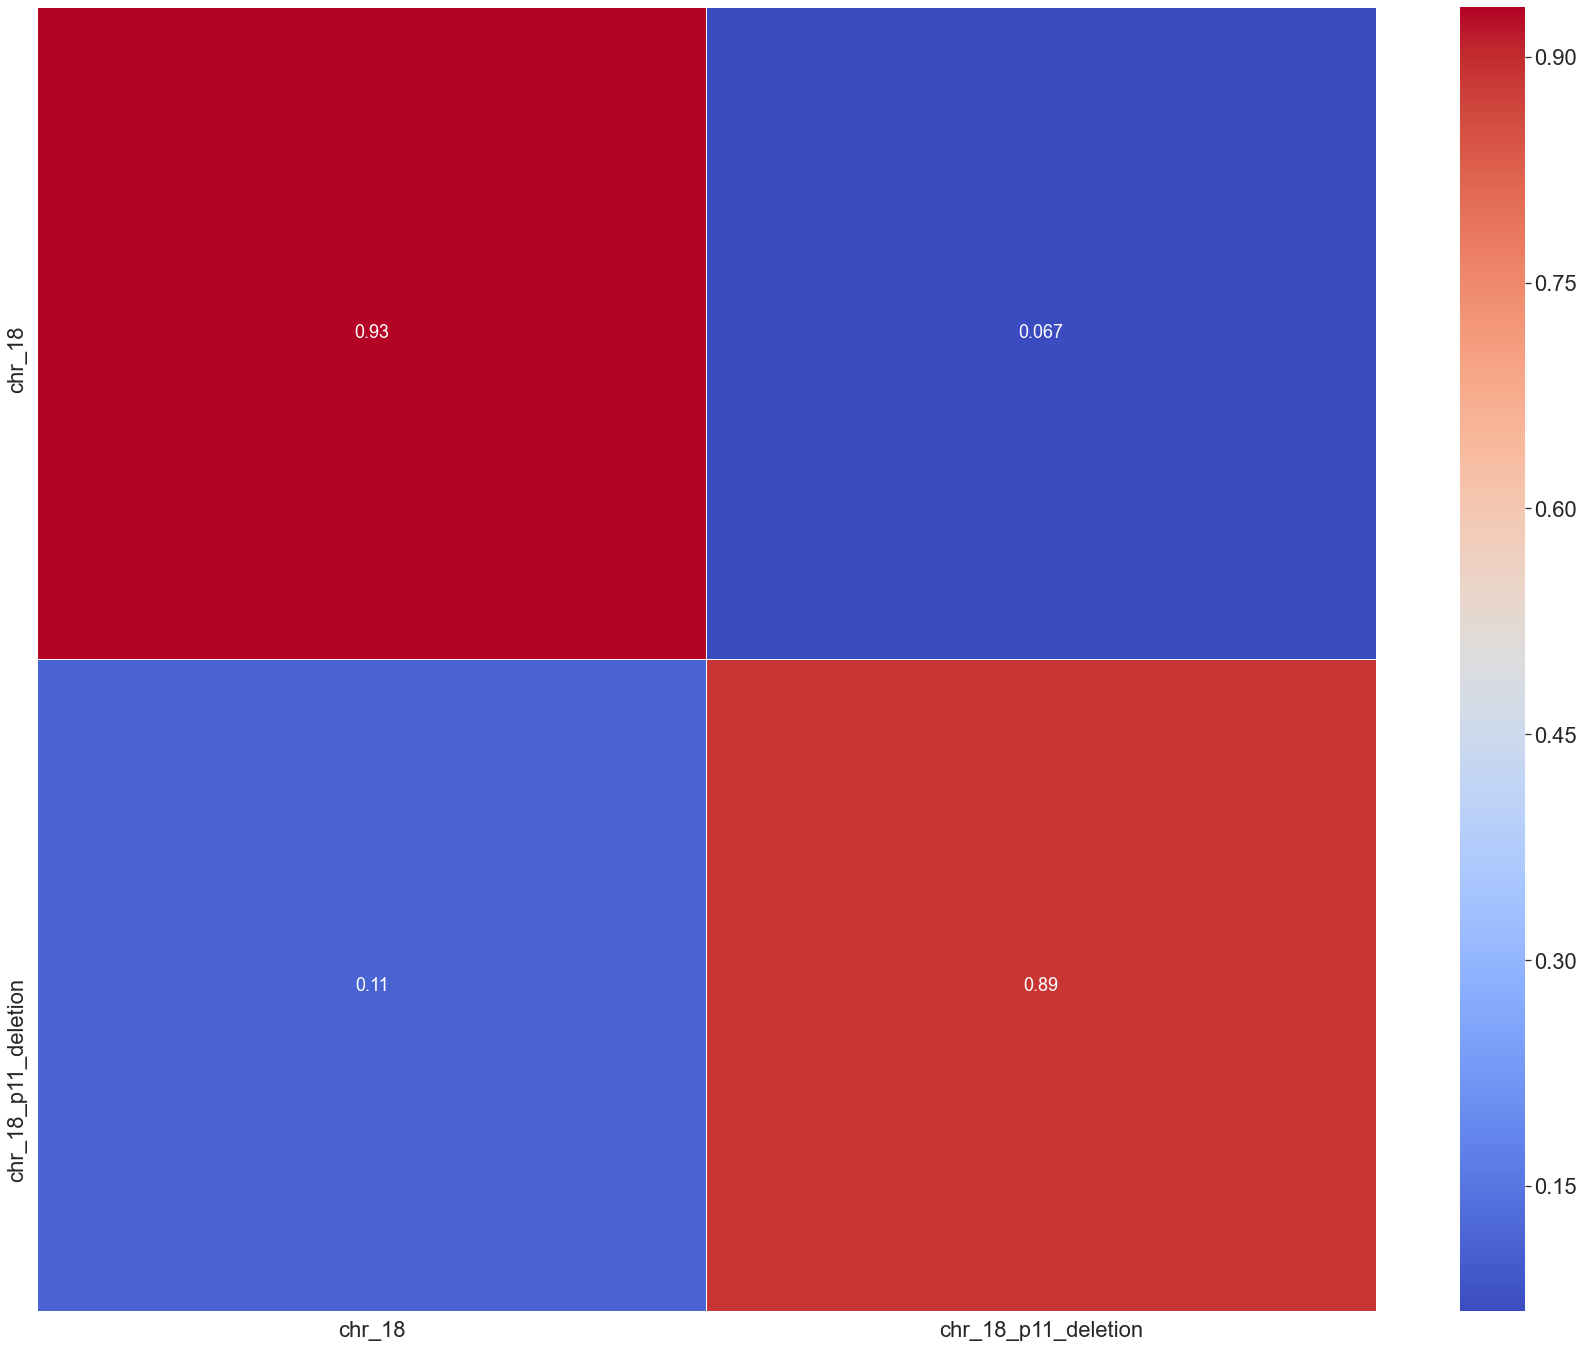

In [27]:
plt.figure(figsize=(30, 24))
heat_map_p = sb.heatmap(confusion_p, annot=True,  # It's a Seaborn function
                      cmap='coolwarm', 
                      xticklabels=confusion.columns, yticklabels=confusion.index, 
                      linewidths=1, 
                      annot_kws={"size": 18})
sb.set(font_scale = 2)

In [28]:
fig = heat_map.get_figure()    
fig.savefig('Heatmap_Combination.png', dpi=400)

In [29]:
fig_r = heat_map_r.get_figure()    
fig_r.savefig('Heatmap_Recall_Combination.png', dpi=400)

In [30]:
fig_p = heat_map_p.get_figure()    
fig_p.savefig('Heatmap_Precision_Combination.png', dpi=400)

# ROC Curve

In [31]:
y_predict_concatenate_array = np.array(y_predict_concatenate_list)
y_predict_concatenate_array

array([[1.00000000e+00, 7.64235608e-09],
       [1.00000000e+00, 1.25939786e-13],
       [9.87334371e-01, 9.93655901e-03],
       [9.99993324e-01, 2.73882551e-06],
       [1.00000000e+00, 3.01001758e-11],
       [9.62506294e-01, 2.55203135e-02],
       [9.99916196e-01, 3.64898806e-05],
       [1.00000000e+00, 1.15485788e-09],
       [1.00000000e+00, 9.07246898e-18],
       [9.99999642e-01, 9.11352913e-07],
       [1.00000000e+00, 4.47473615e-15],
       [1.00000000e+00, 3.06413367e-10],
       [9.92206037e-01, 5.16385911e-03],
       [9.99995470e-01, 5.28198052e-06],
       [9.99999881e-01, 2.36291626e-07],
       [4.13288544e-05, 9.99647141e-01],
       [1.00000000e+00, 2.57520533e-10],
       [1.00000000e+00, 3.88094401e-09],
       [9.99312401e-01, 5.67664043e-04],
       [9.99933124e-01, 4.18712734e-05],
       [1.00000000e+00, 3.11580657e-11],
       [9.89179850e-01, 7.75208836e-03],
       [1.00000000e+00, 2.19537888e-10],
       [1.00000000e+00, 7.27338687e-08],
       [9.999965

In [32]:
y_predict_concatenate_array.shape

(251, 2)

In [33]:
y_predict_1D = y_predict_concatenate_array[:,0]

In [34]:
y_predict_1D_processed = 1- y_predict_1D

In [35]:
fpr , tpr , thresholds = roc_curve(y_test_concatenate_list , y_predict_1D_processed)
auc_rf = auc(fpr, tpr)

In [36]:
auc_rf

0.9372727272727273

In [37]:
x = y = np.arange(0, 1.1, 0.1)

In [38]:
x

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])

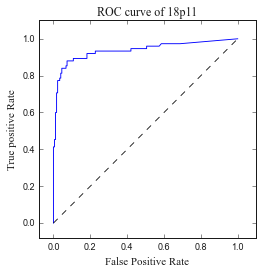

In [39]:
fig = plt.figure()
plt.style.use('classic')

ax = fig.add_subplot(111)

plt.plot(fpr, tpr, color='blue', linewidth=0.9)

plt.plot(x, y, '--', color='black', linewidth=0.8)

plt.title('ROC curve of 18p11', fontsize=12, fontname = 'Times New Roman')

plt.xlabel('False Positive Rate', fontsize=11, fontname = 'Times New Roman')
plt.ylabel('True positive Rate', fontsize=11, fontname = 'Times New Roman')

ax.set_aspect('equal', adjustable='box')

plt.xlim(-0.08, 1.1)
plt.ylim(-0.08, 1.1)

plt.xticks(fontsize=9, fontname = 'Arial')
plt.yticks(fontsize=9, fontname = 'Arial')

plt.savefig('ROC_Curve_Combination.png', dpi=400)
plt.show()

#### 3.10.4.1 AUC Value

In [40]:
auc_value = auc(fpr, tpr)

In [41]:
print('AUC is ', auc_value)

AUC is  0.9372727272727273


# Results

In [42]:
print('Test Accuracy: %.3f' % acc)

Test Accuracy: 0.920


In [43]:
print(performanceReport)

                     precision    recall  f1-score   support

             chr_18       0.93      0.95      0.94       176
chr_18_p11_deletion       0.89      0.84      0.86        75

          micro avg       0.92      0.92      0.92       251
          macro avg       0.91      0.90      0.90       251
       weighted avg       0.92      0.92      0.92       251



In [44]:
type(performanceReport)

str

In [45]:
print('AUC is ', auc_value)

AUC is  0.9372727272727273


## Export to a text file

In [46]:
file_report = open('ResultsCombination.txt', 'w')
file_report.write('Accuracy: %s\n\n' % acc)
file_report.write('AUC: %s.\n\n' % auc_value)
file_report.write('Performance Report: \n%s\n\n' % performanceReport)
file_report.write('Confusion Matrix: \n%s.\n\n' % confusion)
file_report.write('Recall of Confusion Matrix: \n%s.\n\n' % confusion_r)
file_report.write('Precision of Confusion Matrix: \n%s.\n\n' % confusion_p)
file_report.close()